# 1. Analyse exploratoire du dataset

## Objectif :
- Comprendre du mieux possible nos données 
- Utiliser différentes techniques d'analyse de données et machine learning pour faire la segmentation de clients.

## Checklist de base
#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 2240, 29
- **types de variables** : Entier :25, Object :3, Float : 1 
- **Analyse des valeurs manquantes** : 
    - Peu de valeurs manquantes. 
    - Seulement 1 variable comportent des valeurs manquantes.


In [1]:
# Importations des bibliothèques

import warnings
warnings.filterwarnings('ignore')

# Bibliothèques pour aider à la lecture et à la manipulation des données 
import pandas as pd
import numpy as np

# Bibliothèques pour aider à la visualisation des données
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import datetime
from datetime import date

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics

from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans

In [2]:
# Affichage des différentes variables en entier

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',81)

In [3]:
# Importatons notre jeu de données

missing_values = ["n/a", "NaN", "--"]
df = pd.read_csv('segmentation.csv', sep='\t', na_values = missing_values)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [4]:
# Vérifions les dimensions 
df.shape

(2240, 29)

In [5]:
#Affichons les différentes colonnes du dataset
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Déterminons les différentes types des variables que nous avons
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [7]:
# Vérification des valeurs manquantes 
# Pourcentage des valeurs manquantes par ordre coissant (division des valeurs manquantes par la dimension du df et organisation ascendente de celles ci)

(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Income                 0.010714
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64

In [8]:
# Supprimons les valeurs manquantes, puisqu'il y en a pas assez
df = df.dropna(subset=['Income'] ,axis=0)

In [9]:
#Regardons à nouveau notre dataset
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# Plus de valeur manquante ! La présence de valeur manquante, pourrais 

In [11]:
# Affichons la distribution de notre dataset
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2216.000000   2216.000000  2216.000000         2216.0     2216.0   
mean       0.064079      0.013538     0.009477            3.0       11.0   
std        0.244950      0.115588     0.096907            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2216.000000  
mean      0.150271  
std       0.357417  
min       0.000000  
25%       0.000000  
50%   

In [12]:
# La description 

In [13]:
# Copie du dataset
Data = df.copy()

In [14]:
# Supprimons la variable ID car elle ne nous servira pas dans notre analyse.
Data = Data.drop('ID',axis=1)
Data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     04-09-2012       58       635         88              546   
1     08-03-2014       38        11          1                6   
2     21-08-2013       26       426         49              127   
3     10-02-2014       26        11          4               20   
4     19-01-2014       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  13-06-2013       46       709         43              182   
2236  10-06-2014       56       406          0               30   
2237  25-01-2014       91       908         48              217   
2238  24-01-2014        8       428         30              214   
2239  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0   

### Visualisation des différentes variables

#### Visualisons la variable 'Education'

Text(0.5, 1.0, "Diagramme du Niveau d'éducation")

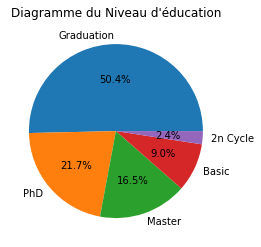

In [15]:
# Visualisons la variable 'Education'
plt.figure()
plt.pie(Data['Education'].value_counts(), labels=Data['Education'].unique(), autopct='%.1f%%')
plt.title("Diagramme du Niveau d'éducation" )

#### En regardant de plus prêt on peut, pour un soucis de compréhension, regrouper les niveaux d'éducation en deux catégories:
* Basic, 2n Cycle => Pour les clients moins diplomés
* Graduation, PhD, Master => Pour les clients diplomés

In [16]:
# Remplaçons les deux catégories dans la variable 'Education'
Data['Education']= Data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

([<matplotlib.patches.Wedge at 0x1cfdb0873a0>,
 [Text(-1.0294507535624926, 0.38759662793891325, 'Undergraduate'),
  Text(1.029450771707199, -0.38759657974684514, 'Postgraduate')],
 [Text(-0.5615185928522686, 0.21141634251213448, '88.54%'),
  Text(0.5615186027493813, -0.21141631622555188, '11.46%')])

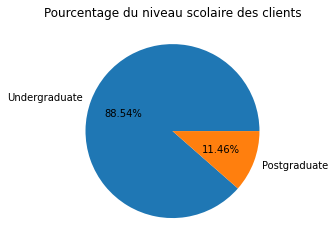

In [17]:
#Visualisons la variable Education
count = pd.value_counts(Data['Education']).tolist()
plt.figure(figsize=(4,4))
plt.title("Pourcentage du niveau scolaire des clients")
plt.pie(x=count,labels=["Undergraduate","Postgraduate"],autopct='%.2f%%')

In [18]:
#### Nous remarquons qu'il y a plus de client (88,54%) qui ont fait le premier cycle universiatire et 11, 46% ont un niveau plus élévé

#### Analysons la variable Marital_Status

Text(0.5, 1.0, 'Diagramme de la Situation Matrimoniale')

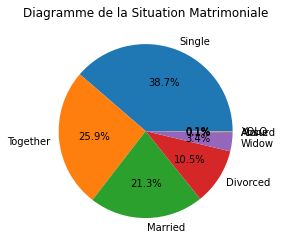

In [19]:
# Visualisons la variable 'Marital_status'
plt.figure()
plt.pie(Data['Marital_Status'].value_counts(), labels=Data['Marital_Status'].unique(), autopct='%.1f%%')
plt.title("Diagramme de la Situation Matrimoniale" )

In [20]:
# Il ya des catégories qui ne sont pas très visibles. Affichons alors les différentes catégories de la variable
Data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

#### Nous remarquons ici que :
* il y a 8 catégories dans la variable 'Marital_status' 
* Il y a 38% de client qui sont seuls

#### En regardant de plus prêt on peut regrouper la situation matrimoniale en deux catégorie. Puisse que:
* Together,Maried => Etre en couple
* Single, Divorced, Widow, Yolo, Alone, Absurd => Célibataire

In [21]:
# Remplaçons par ces catégories
Data['Marital_Status']=Data['Marital_Status'].replace({'Divorced':'Celib','Single':'Celib','Married':'En couple','Alone':'Celib','Together':'En couple','Absurd':'Celib','Widow':'Celib','YOLO':'Celib'})

Text(0.5, 1.0, 'Diagramme de la Situation Matrimoniale')

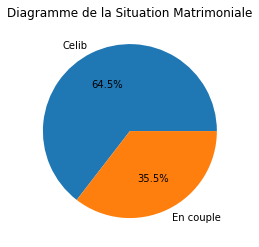

In [22]:
# Révisionnalisons notre dataset
plt.figure()
plt.pie(Data['Marital_Status'].value_counts(), labels=Data['Marital_Status'].unique(), autopct='%.1f%%')
plt.title("Diagramme de la Situation Matrimoniale" )

#### On en déduit alors qu'il y a 64,5 % de client qui sont célibataire contre 35,5% en couple

##### Analysons les variables Kidhome et TeenHomme

<AxesSubplot:xlabel='Kidhome', ylabel='Density'>

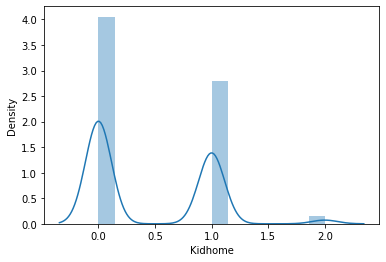

In [23]:
# Visualisation de la variable Kidhome
sns.distplot(Data['Kidhome'])

<AxesSubplot:xlabel='Teenhome', ylabel='Density'>

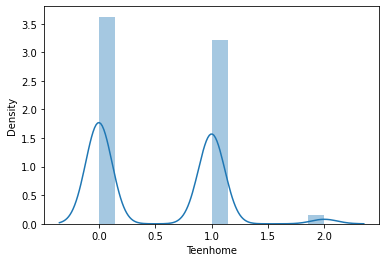

In [24]:
# Visualisation de la variable Kidhome
sns.distplot(Data['Teenhome'])

Nous remarquons la variable Teenhome et Kihome ont la meme distribution.

Pour une meilleur analyse, regroupons les variables Kidhome et TeenHome en une seule variable afin de déterminer le nombre d'enfant des clients

In [25]:
# Additions du nombre d'enfants et d'adoléscents dans le ménage du client
Data['Nbr_Enf']=Data['Kidhome']+Data['Teenhome']

In [26]:
# Nous pouvons simplifier la colonne en choix binaire
Data['Enfants'] = np.where(Data.Nbr_Enf> 0, 'enfant', 'Pas_d_enfant')

([<matplotlib.patches.Wedge at 0x1cfdb2e4790>,
 [Text(-0.6860128990602854, 0.859875748188599, 'enfant'),
  Text(0.6860128185529041, -0.8598758124177587, 'Pas_d_enfant')],
 [Text(-0.3741888540328829, 0.4690231353755994, '71.44%'),
  Text(0.3741888101197658, -0.46902317040968644, '28.56%')])

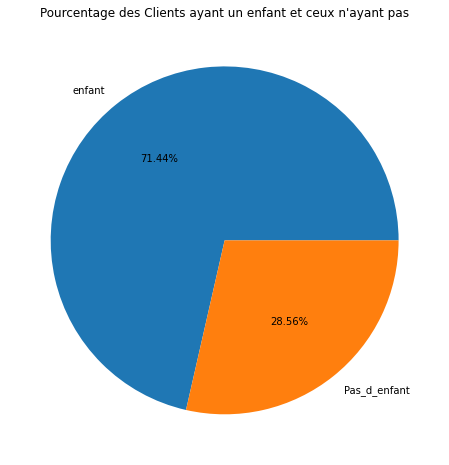

In [27]:
count = pd.value_counts(Data['Enfants']).tolist()
plt.figure(figsize=(8,8))
plt.title("Pourcentage des Clients ayant un enfant et ceux n'ayant pas")
plt.pie(x=count,labels=["enfant","Pas_d_enfant"],autopct='%.2f%%')

Nous remarquons qu'il y a 71,44 % de client qui ont des enfants contre 28,56% qui n'on en pas

#### Analysons la variable 'Income'

<AxesSubplot:xlabel='Income', ylabel='Density'>

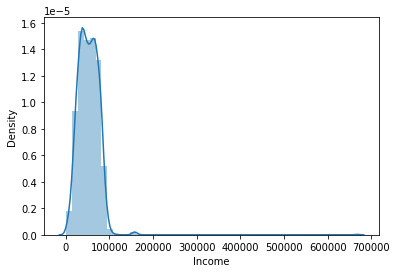

In [28]:
# Histogrammes de la variable continue 'Income'
plt.figure()
sns.distplot(Data['Income'])

<AxesSubplot:>

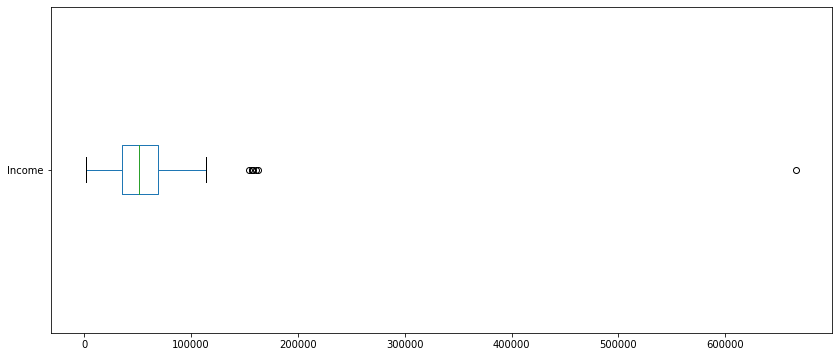

In [29]:
# Y a t'il des valeurs aberrentes dans 'Income' ?
Data['Income'].plot(kind='box', vert=False, figsize=(14,6))

In [30]:
##### On remarque qu'il y a une valeur aberrente Income > 600000

#### Analyse de la variable 'Year_Birth'

<AxesSubplot:xlabel='Year_Birth', ylabel='Density'>

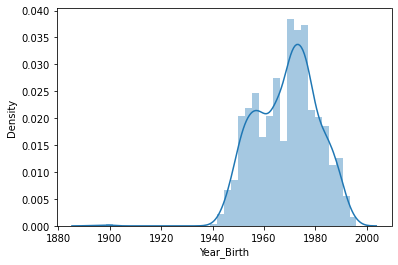

In [31]:
# Visualisons la variable 
sns.distplot(Data['Year_Birth'])

In [32]:
# Créons une colonne qui sera le calcul de l'age du client (dernière année du dataset-l'année de naissance du client)

Data['Age']=2014-Data['Year_Birth']

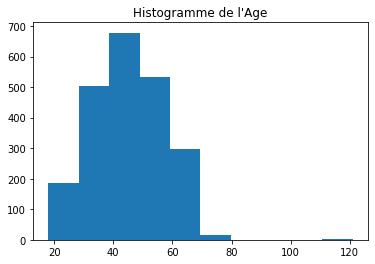

In [33]:
plt.hist(Data['Age'])
plt.title("Histogramme de l'Age")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

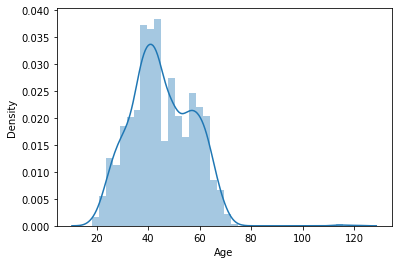

In [34]:
# Visualisons la distribution
sns.distplot(Data['Age'])

<AxesSubplot:>

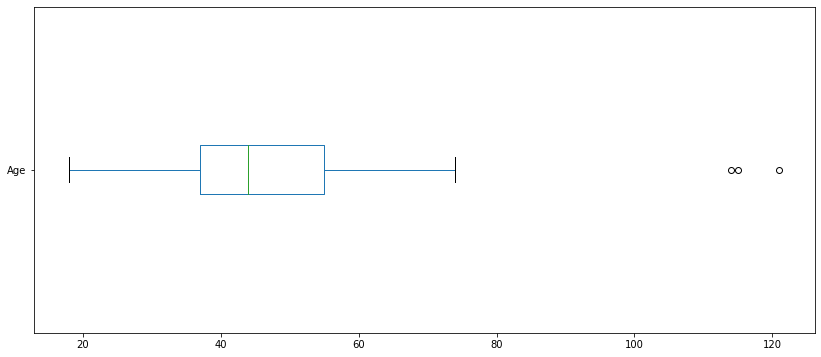

In [35]:
# 
Data['Age'].plot(kind='box', vert=False, figsize=(14,6))

##### Pour faciliter notre analyse, catégorisons la variable 'Age'

In [36]:
# Fonction de catégorisation
def Age_Group(i):
    if i < 25:
        return 'Jeunes'
    elif 35 <= i <= 64:
        return'Adultes'
    elif 25 <= i <= 34:
        return'Mature' # Jeune Adulte
    elif i > 64:
        return'Seniors'
Age_Group(33)

'Mature'

In [37]:
Data['Age_Group'] = Data['Age'].map(Age_Group)

In [38]:
Data

Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Postgraduate          Celib  58138.0        0         0   
1           1954  Postgraduate          Celib  46344.0        1         1   
2           1965  Postgraduate      En couple  71613.0        0         0   
3           1984  Postgraduate      En couple  26646.0        1         0   
4           1981  Postgraduate      En couple  58293.0        1         0   
...          ...           ...            ...      ...      ...       ...   
2235        1967  Postgraduate      En couple  61223.0        0         1   
2236        1946  Postgraduate      En couple  64014.0        2         1   
2237        1981  Postgraduate          Celib  56981.0        0         0   
2238        1956  Postgraduate      En couple  69245.0        0         1   
2239        1954  Postgraduate      En couple  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     04-09-2012       58       635         88              546   
1     08-03-2014       38        11          1                6   
2     21-08-2013       26       426         49              127   
3     10-02-2014       26        11          4               20   
4     19-01-2014       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  13-06-2013       46       709         43              182   
2236  10-06-2014       56       406          0               30   
2237  25-01-2014       91       908         48              217   
2238  24-01-2014        8       428         30              214   
2239  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7       

##### Visualisons les variables 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' 

In [39]:
#Renommons les différentes variables
Data = Data.rename(columns={'MntWines': "Vins",'MntFruits':'Fruits','MntMeatProducts':'Viande','MntFishProducts':'Poisson','MntSweetProducts':'Sucreries','MntGoldProds':'Or'})

In [40]:
boxplot_cols = ['Vins', 'Fruits', 'Viande', 'Poisson', 'Sucreries', 'Or']

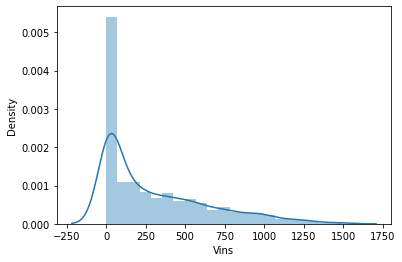

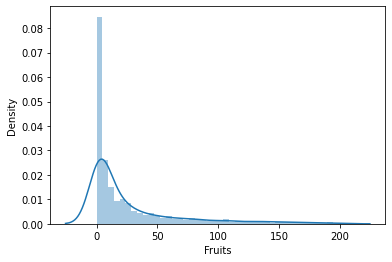

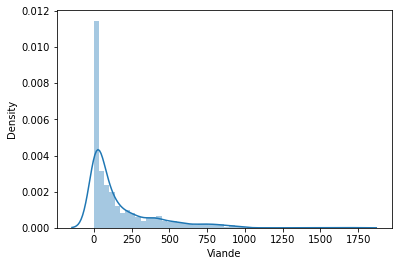

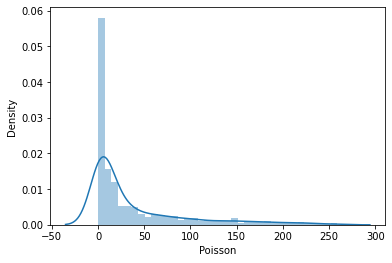

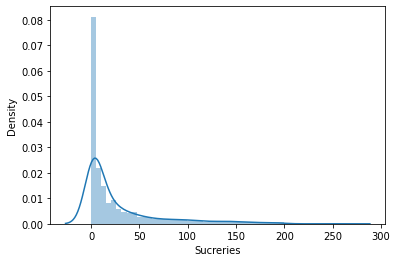

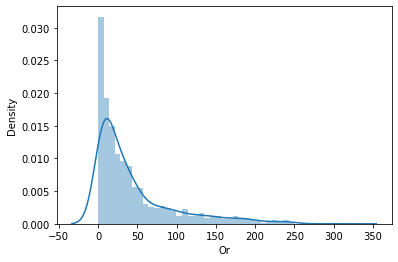

In [41]:
for col in boxplot_cols:
    plt.figure()
    sns.distplot(Data[col])

On remarque que les variables 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ont pratiquement la meme distribution.
Regroupons ses variables en une seule afin d'avoir le montant total des dépenses du client

In [42]:
# La somme des dépenses des clients
Data['Depenses']=Data['Vins']+Data['Fruits']+Data['Viande']+Data['Poisson']+Data['Sucreries']+Data['Or']

<AxesSubplot:xlabel='Depenses', ylabel='Density'>

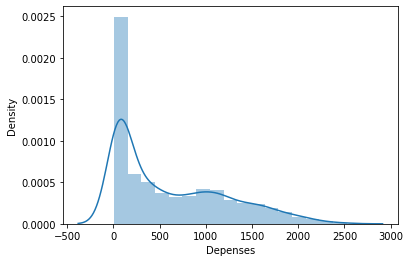

In [43]:
# Vérifions si la variable a gardé la meme distribution
plt.figure()
sns.distplot(Data['Depenses'])

Pour notre analyse, déterminons l'ancienneté du client dans l'entreprise

In [44]:
# Calculons l'ancienneté du client
Fin_Date = date(2014,10,4)

Data['Anciennete'] = pd.to_datetime(Data['Dt_Customer'], dayfirst=True,format = '%d-%m-%Y')
Data['Anciennete'] = pd.to_numeric(Data['Anciennete'].dt.date.apply(lambda x: (Fin_Date - x)).dt.days, downcast='integer')/30

In [45]:
Data['Anciennete']

0       25.333333
1        7.000000
2       13.633333
3        7.866667
4        8.600000
          ...    
2235    15.933333
2236     3.866667
2237     8.400000
2238     8.433333
2239    23.966667
Name: Anciennete, Length: 2216, dtype: float64

##### Renommons les variables des achats effectués par le client

In [46]:
Data = Data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalogue','NumStorePurchases':'Magasin'})

#### Visualisons la distribution des achats effectuées avec une remise

In [47]:
boxplot_rem = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain','Z_Revenue','Z_CostContact']

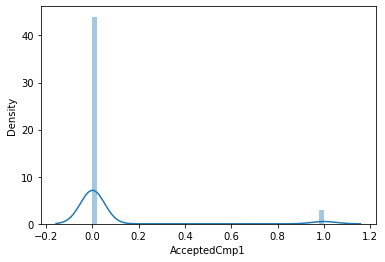

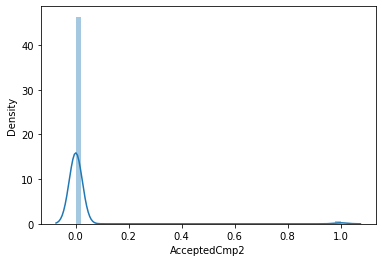

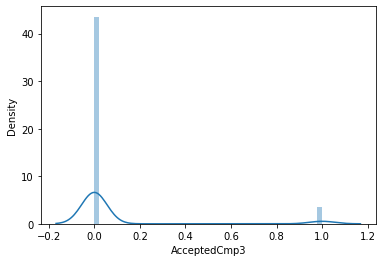

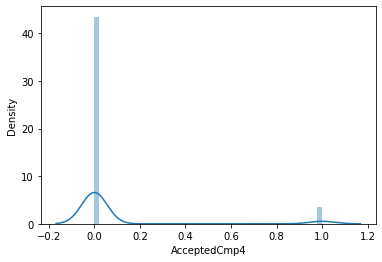

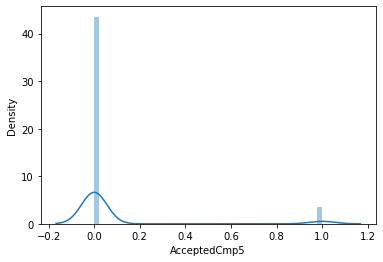

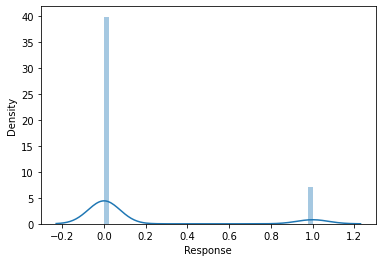

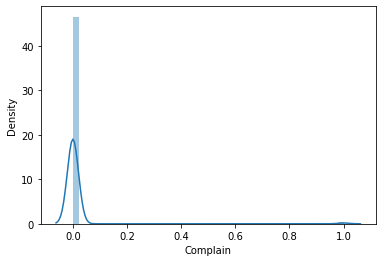

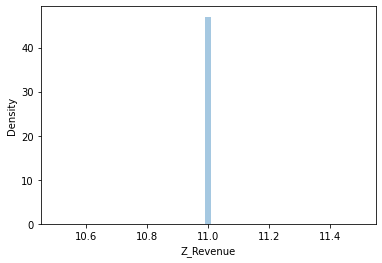

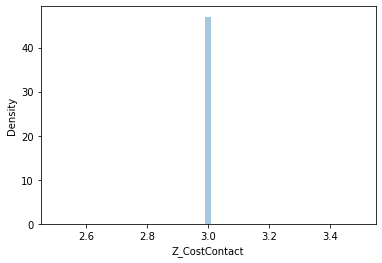

In [48]:
for col in boxplot_rem:
    plt.figure()
    sns.distplot(Data[col])

Les variables des achats effectuées avec remise ont la meme distribution.
Mais nous n'utiliserons pas ses variables.

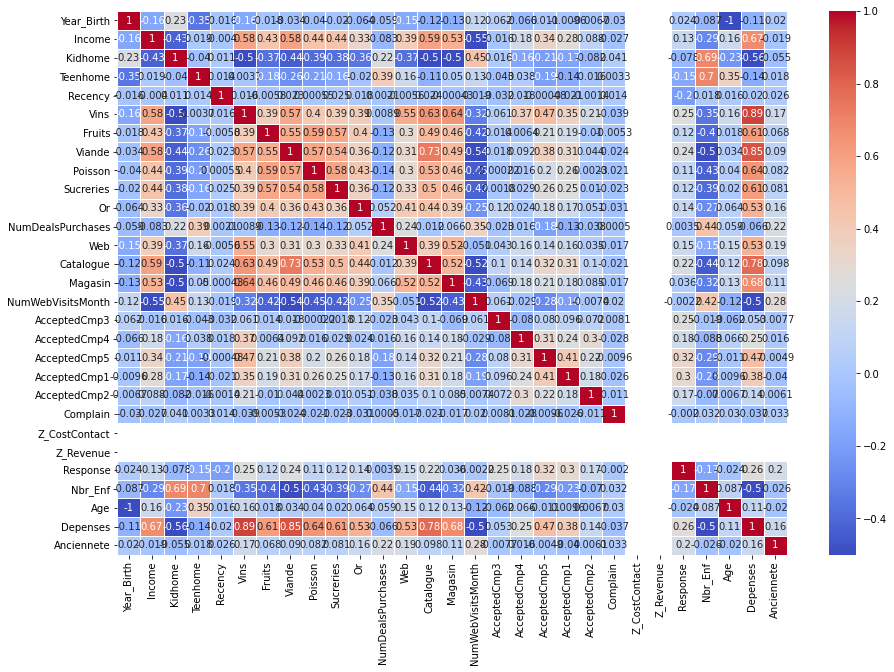

In [49]:
# Affichons la corrélation entre les variables
corr= Data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot= True,vmin=-0.5,vmax=1, cmap='coolwarm',linewidths=0.75)
plt.show()

<AxesSubplot:xlabel='Age_Group', ylabel='Depenses'>

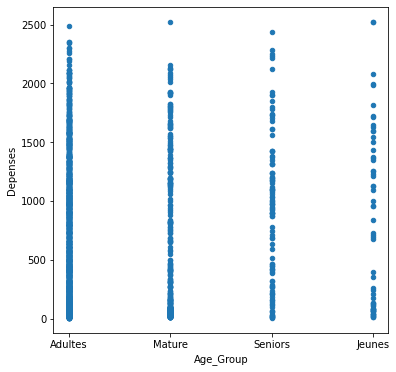

In [50]:
# Y a t'il une rélation entre client et les dépenses ?
Data.plot(kind='scatter', x='Age_Group', y='Depenses', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Income'>

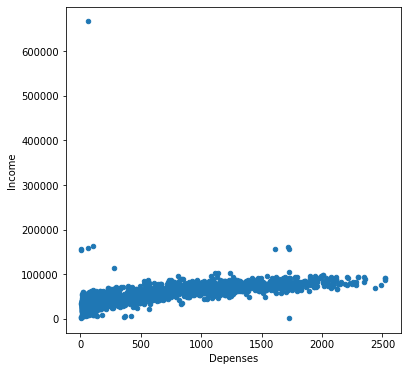

In [51]:
# Y a t'il une rélation entre les revenus et les dépenses ?
Data.plot(kind='scatter', x='Depenses', y='Income', figsize=(6,6))

<AxesSubplot:xlabel='Marital_Status', ylabel='Age'>

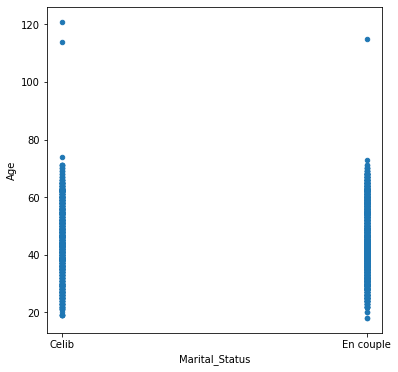

In [52]:
#Y a t'il une rélation entre l'Age et la situation matrimonial ?
Data.plot(kind='scatter', x='Marital_Status', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Education', ylabel='Age'>

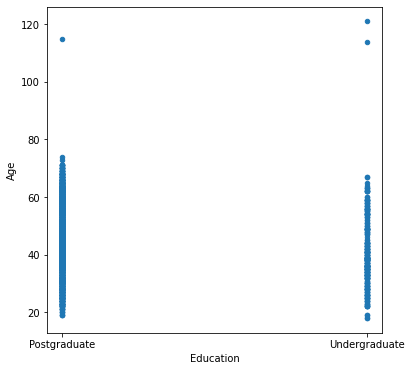

In [53]:
# Y a t'il une rélation entre l'Age et l'éducation ?
Data.plot(kind='scatter', x='Education', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Education', ylabel='Age'>

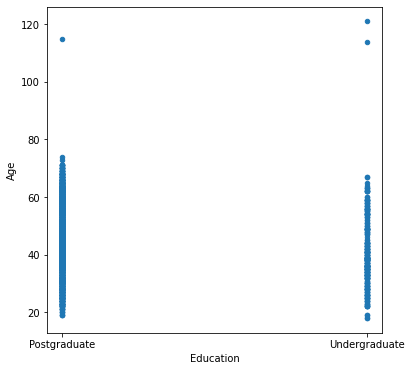

In [54]:
# Y a t'il une rélation entre Education et l'Age ?
Data.plot(kind='scatter', x='Education', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Nbr_Enf', ylabel='Age'>

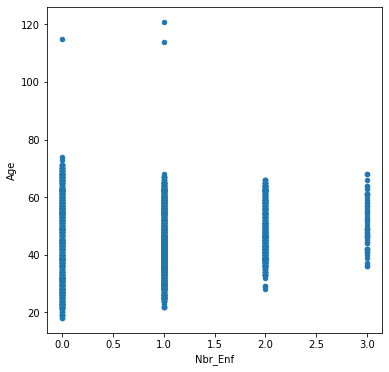

In [55]:
# Y a t'il une rélation entre le nombre d'enfant et l'age ?
Data.plot(kind='scatter', x='Nbr_Enf', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Enfants', ylabel='Age'>

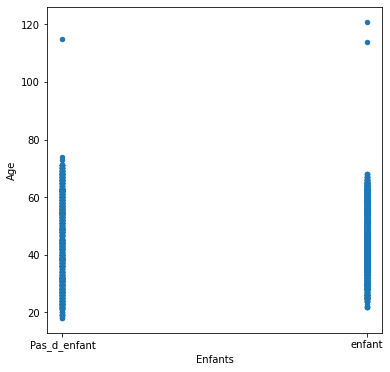

In [56]:
# Y a t'il une rélation entre le fait d'avoir un enfant et l'age ?
Data.plot(kind='scatter', x='Enfants', y='Age', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Vins'>

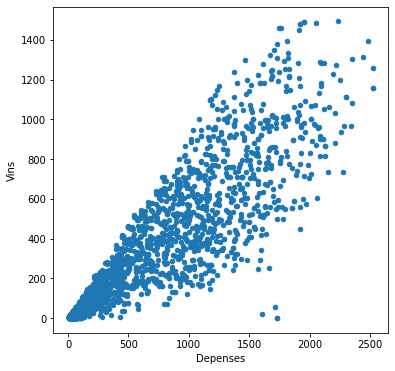

In [57]:
# Y a t'il une rélation entre Vins et les dépenses ?
Data.plot(kind='scatter', x='Depenses', y='Vins', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Fruits'>

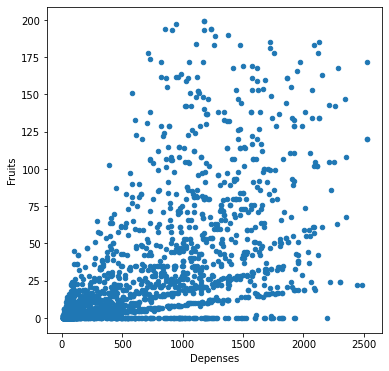

In [58]:
# Y a t'il une rélation entre 'Fruits' et les 'dépenses' ?
Data.plot(kind='scatter', x='Depenses', y='Fruits', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Viande'>

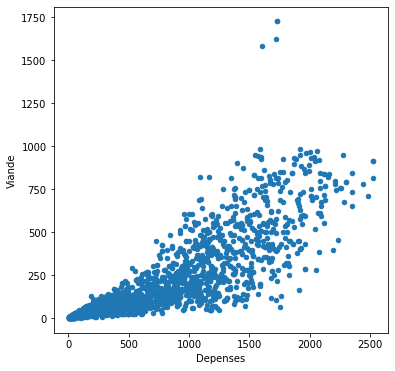

In [59]:
# Y a t'il une rélation entre Viande et les dépenses ?
Data.plot(kind='scatter', x='Depenses', y='Viande', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Sucreries'>

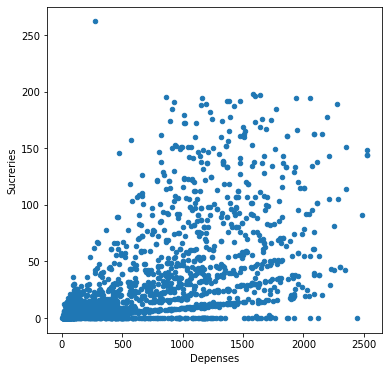

In [60]:
#Y a t'il une rélation entre Svcreries et les dépenses ?
Data.plot(kind='scatter', x='Depenses', y='Sucreries', figsize=(6,6))

<AxesSubplot:xlabel='Depenses', ylabel='Or'>

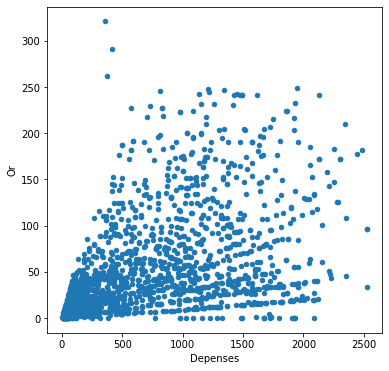

In [61]:
# Y a t'il une rélation entre Or et les dépenses ?
Data.plot(kind='scatter', x='Depenses', y='Or', figsize=(6,6))

#### Vérifions l'existence des outliers

In [62]:
X_num = Data.select_dtypes(exclude=object)

In [63]:
X_num

Year_Birth   Income  Kidhome  Teenhome  Recency  Vins  Fruits  Viande  \
0           1957  58138.0        0         0       58   635      88     546   
1           1954  46344.0        1         1       38    11       1       6   
2           1965  71613.0        0         0       26   426      49     127   
3           1984  26646.0        1         0       26    11       4      20   
4           1981  58293.0        1         0       94   173      43     118   
...          ...      ...      ...       ...      ...   ...     ...     ...   
2235        1967  61223.0        0         1       46   709      43     182   
2236        1946  64014.0        2         1       56   406       0      30   
2237        1981  56981.0        0         0       91   908      48     217   
2238        1956  69245.0        0         1        8   428      30     214   
2239        1954  52869.0        1         1       40    84       3      61   

      Poisson  Sucreries   Or  NumDealsPurchases  Web  Catalogue  Magasin  \
0         172         88   88                  3    8         10        4   
1           2          1    6                  2    1          1        2   
2         111         21   42                  1    8          2       10   
3          10          3    5                  2    2          0        4   
4          46         27   15                  5    5          3        6   
...       ...        ...  ...                ...  ...        ...      ...   
2235       42        118  247                  2    9          3        4   
2236        0          0    8                  7    8          2        5   
2237       32         12   24                  1    2          3       13   
2238       80         30   61                  2    6          5       10   
2239        2          1   21                  3    3          1        4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0                0             0         0              3         11   
1                0             0         0              3         11   
2                0             0         0              3         11   
3                0             0         0              3         11   
4                0             0         0              3         11   
...            ...           ...       ...            ...        ...   
2235             0             0         0              3         11   
2236             1             0         0              3         11   
2237             0             0         0              3         11   
2238             0             0         0              3         11   
2239             0             0         0              3         11   

      Response  Nbr_Enf  Age  Depenses  Anciennete  
0            1        0   57      1617   25.333333  
1            0        2   60        27    7.000000  
2            0        0   49       776   13.633333  
3            0        1   30        53    7.866667  
4            0        1   33       422    8.600000  
...        ...      ...  ...       ...         ...  
2235         0        1   47      1341   15.933333  
2236         0

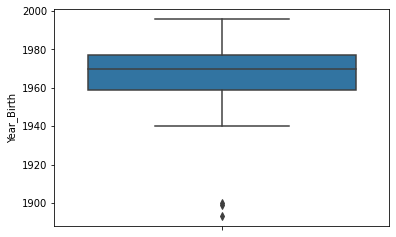

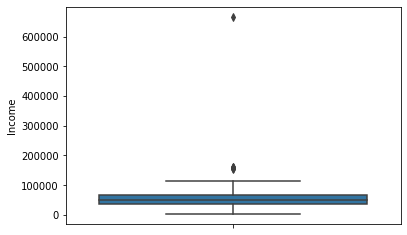

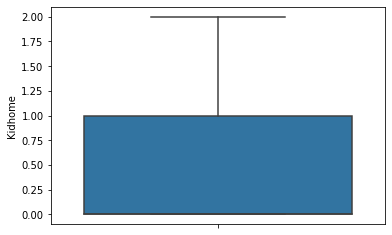

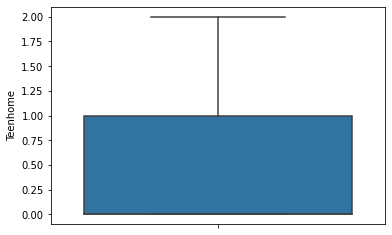

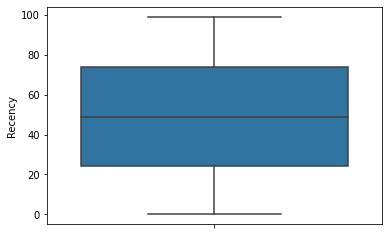

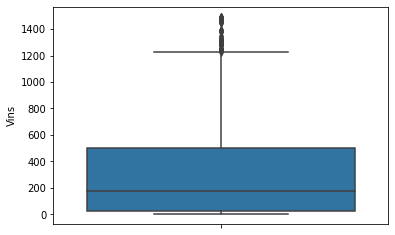

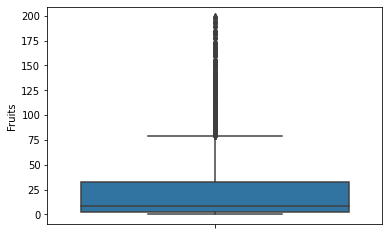

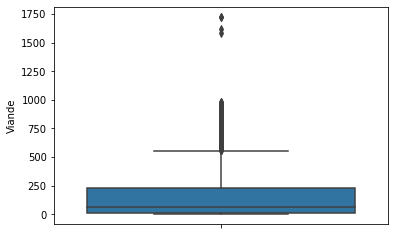

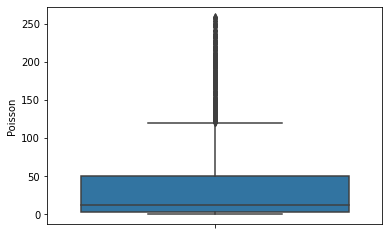

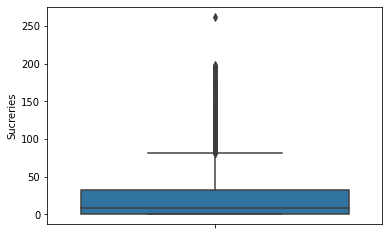

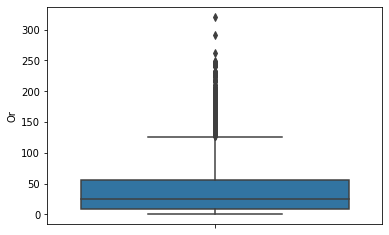

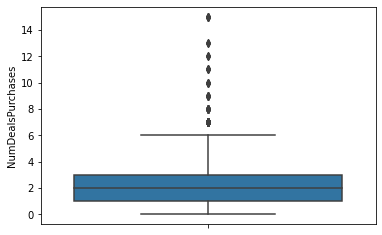

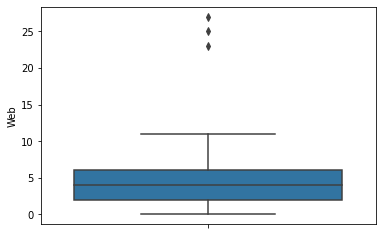

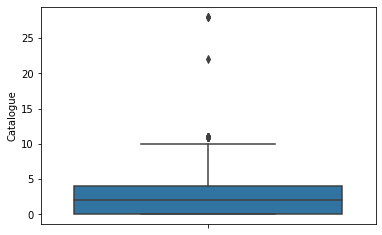

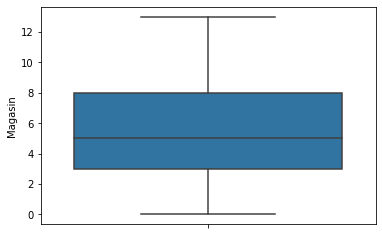

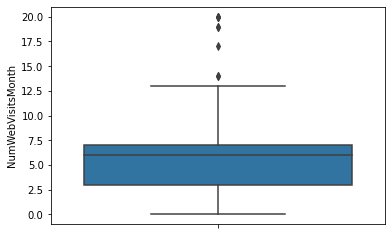

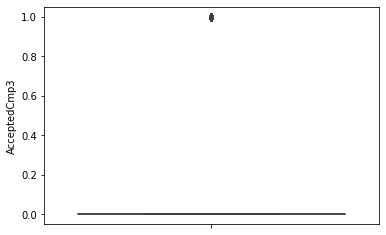

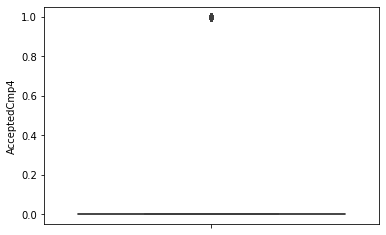

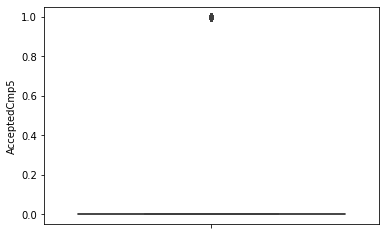

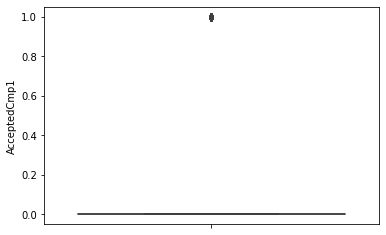

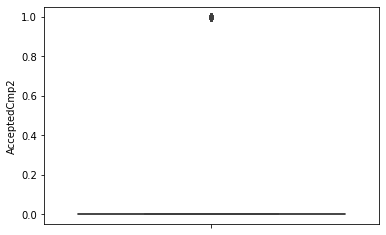

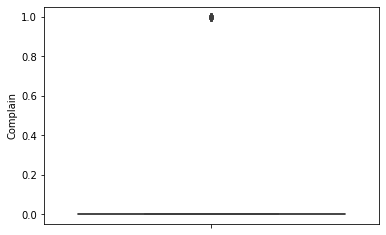

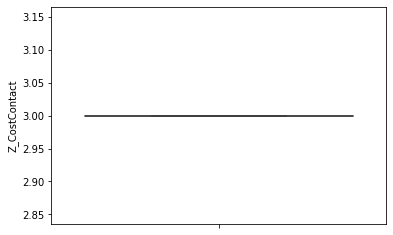

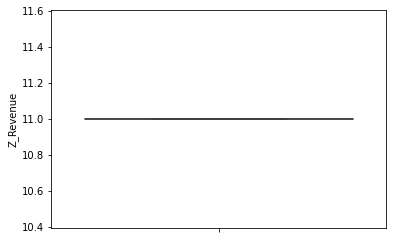

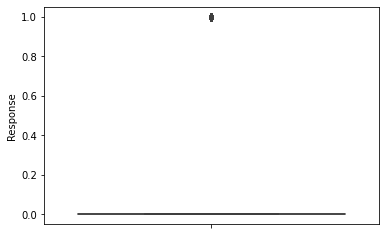

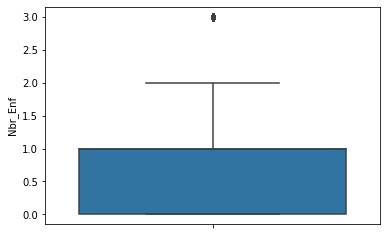

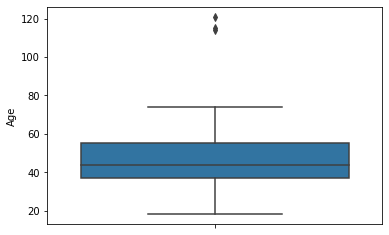

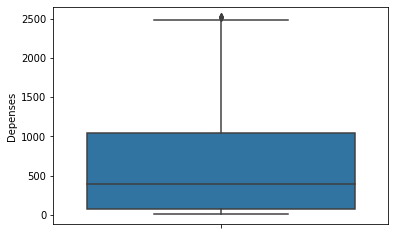

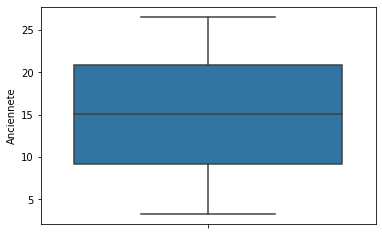

In [64]:
# Y a t'il des valeurs aberrantes ? Vérifions cela
for i in X_num:
    sns.boxplot(y=X_num[f"{i}"], data=X_num)
    plt.show()

***************************************************************************************

##### Après analyse, affichons notre nouveau dataset

In [65]:
Dataframes = Data[['Age','Education','Marital_Status','Income','Depenses','Anciennete','Enfants','Nbr_Enf','Vins','Fruits','Viande','Poisson','Sucreries','Or']]
Dataframes.head()

Age     Education Marital_Status   Income  Depenses  Anciennete  \
0   57  Postgraduate          Celib  58138.0      1617   25.333333   
1   60  Postgraduate          Celib  46344.0        27    7.000000   
2   49  Postgraduate      En couple  71613.0       776   13.633333   
3   30  Postgraduate      En couple  26646.0        53    7.866667   
4   33  Postgraduate      En couple  58293.0       422    8.600000   

        Enfants  Nbr_Enf  Vins  Fruits  Viande  Poisson  Sucreries  Or  
0  Pas_d_enfant        0   635      88     546      172         88  88  
1        enfant        2    11       1       6        2          1   6  
2  Pas_d_enfant        0   426      49     127      111         21  42  
3        enfant        1    11       4      20       10          3   5  
4        enfant        1   173      43     118       46         27  15

In [66]:
# Supprimons les valeurs aberrantes contenues dans la variable 'Income'

Dataframes = Dataframes[Dataframes['Income']<600000]

*********************************************************************************

### Fesons un regroupement des différents types de clients
#### Définisons 4 types de clients
* Stars : Ancien client avec des revenus élévés et des dépenses élévées
* Attention: Nouveau client avec des revenus inferieurs à la moyen et de faible depenses
* Level up : Nouveau client avec des revenus élevéz et des dépenses élevés
* Level Down : Ancien client avec des revenus inférieurs à la moyenne et une nature peu dépensière

#### Normalisons nos données 

In [67]:
Dataframes.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Depenses',
       'Anciennete', 'Enfants', 'Nbr_Enf', 'Vins', 'Fruits', 'Viande',
       'Poisson', 'Sucreries', 'Or'],
      dtype='object')

In [68]:
# Affichage des variables categorielles et de leurs modalités
for col in Dataframes.select_dtypes("object"):
    print(col, Data[col].unique())

Education ['Postgraduate' 'Undergraduate']
Marital_Status ['Celib' 'En couple']
Enfants ['Pas_d_enfant' 'enfant']


In [69]:
X_obj = Dataframes.select_dtypes(object)

In [70]:
X_obj

Education Marital_Status       Enfants
0     Postgraduate          Celib  Pas_d_enfant
1     Postgraduate          Celib        enfant
2     Postgraduate      En couple  Pas_d_enfant
3     Postgraduate      En couple        enfant
4     Postgraduate      En couple        enfant
...            ...            ...           ...
2235  Postgraduate      En couple        enfant
2236  Postgraduate      En couple        enfant
2237  Postgraduate          Celib  Pas_d_enfant
2238  Postgraduate      En couple        enfant
2239  Postgraduate      En couple        enfant

[2215 rows x 3 columns]

In [71]:
# Encodage des variables qualitatives
def encodage(Dataframes):
    Encoder = {
        'Celib': 0,
        'En couple':1,
        'Postgraduate':1,
        'Undergraduate':0,
        'enfant':1,
        'Pas_d_enfant':0,
    }
    for col in Dataframes.select_dtypes("object").columns:
        Dataframes[col] = Dataframes[col].map(Encoder)
    
    return Dataframes

In [72]:
X_obj = encodage(Dataframes)
X_obj

Age  Education  Marital_Status   Income  Depenses  Anciennete  Enfants  \
0      57          1               0  58138.0      1617   25.333333        0   
1      60          1               0  46344.0        27    7.000000        1   
2      49          1               1  71613.0       776   13.633333        0   
3      30          1               1  26646.0        53    7.866667        1   
4      33          1               1  58293.0       422    8.600000        1   
...   ...        ...             ...      ...       ...         ...      ...   
2235   47          1               1  61223.0      1341   15.933333        1   
2236   68          1               1  64014.0       444    3.866667        1   
2237   33          1               0  56981.0      1241    8.400000        0   
2238   58          1               1  69245.0       843    8.433333        1   
2239   60          1               1  52869.0       172   23.966667        1   

      Nbr_Enf  Vins  Fruits  Viande  Poisson  Sucreries   Or  
0           0   635      88     546      172         88   88  
1           2    11       1       6        2          1    6  
2           0   426      49     127      111         21   42  
3           1    11       4      20       10          3    5  
4           1   173      43     118       46         27   15  
...       ...   ...     ...     ...      ...        ...  ...  
2235        1   709      43     182       42        118  247  
2236        3   406       0      30        0          0    8  
2237        0   908      48     217       32         12   24  
2238        1   428      30     214       80         30   61  
2239        2    84       3      61        2          1   21  

[2215 rows x 14 columns]

In [73]:
X_num = Dataframes.select_dtypes(exclude=object)

In [74]:
# Encodage des variables quantitatives
scaler=StandardScaler()
X_num[X_num.columns] = scaler.fit_transform(X_num)

In [75]:
# Dataset normaliser et encoder
Dataframe = pd.concat([X_obj, X_num], axis=1)
Dataframe

Age  Education  Marital_Status   Income  Depenses  Anciennete  Enfants  \
0      57          1               0  58138.0      1617   25.333333        0   
1      60          1               0  46344.0        27    7.000000        1   
2      49          1               1  71613.0       776   13.633333        0   
3      30          1               1  26646.0        53    7.866667        1   
4      33          1               1  58293.0       422    8.600000        1   
...   ...        ...             ...      ...       ...         ...      ...   
2235   47          1               1  61223.0      1341   15.933333        1   
2236   68          1               1  64014.0       444    3.866667        1   
2237   33          1               0  56981.0      1241    8.400000        0   
2238   58          1               1  69245.0       843    8.433333        1   
2239   60          1               1  52869.0       172   23.966667        1   

      Nbr_Enf  Vins  Fruits  Viande  Poisson  Sucreries   Or       Age  \
0           0   635      88     546      172         88   88  0.986016   
1           2    11       1       6        2          1    6  1.236344   
2           0   426      49     127      111         21   42  0.318476   
3           1    11       4      20       10          3    5 -1.266933   
4           1   173      43     118       46         27   15 -1.016605   
...       ...   ...     ...     ...      ...        ...  ...       ...   
2235        1   709      43     182       42        118  247  0.151590   
2236        3   406       0      30        0          0    8  1.903884   
2237        0   908      48     217       32         12   24 -1.016605   
2238        1   428      30     214       80         30   61  1.069458   
2239        2    84       3      61        2          1   21  1.236344   

      Education  Marital_Status    Income  Depenses  Anciennete   Enfants  \
0      0.359897       -1.348357  0.286604  1.675011    1.528882 -1.580889   
1      0.359897       -1.348357 -0.261407 -0.962727   -1.188066  0.632555   
2      0.359897        0.741643  0.912723  0.279830   -0.205025 -1.580889   
3      0.359897        0.741643 -1.176680 -0.919594   -1.059629  0.632555   
4      0.359897        0.741643  0.293806 -0.307440   -0.950951  0.632555   
...         ...             ...       ...       ...         ...       ...   
2235   0.359897        0.741643  0.429949  1.217140    0.135828  0.632555   
2236   0.359897        0.741643  0.559634 -0.270943   -1.652417  0.632555   
2237   0.359897       -1.348357  0.232844  1.051244   -0.980590 -1.580889   
2238   0.359897        0.741643  0.802694  0.390980   -0.975650  0.632555   
2239   0.359897        0.741643  0.041779 -0.722179    1.326346  0.632555   

       Nbr_Enf      Vins    Fruits    Viande   Poisson  Sucreries        Or  
0    -1.264487  0.977779  1.548973  1.689714  2.453932   1.484340  0.849633  
1     1.405522 -0.872375 -0.637338 -0.718196 -0.651178  -0.634081 -0.733043  
2    -1.264487  0.358096  0.568903 -0.178646  1.339745  -0.147087 -0.038210  
3     0.070517 -0.872375 -0.561948 -0.655768 -0.505056  -0.585381 -0.752344  
4     0.070517 -0.392047  0.418123 -0.218777  0.152497  -0.000989 -0.559335  
...        ...       ...       ...       ...       ...        ...       ...  
2235  0.070517  1.197188  0.418123  0.066605  0.079436   2.214830  3.918482  
2236  2.740526  0.298796 -0.662468 -0.611177 -0.687709  -0.658430 -0.694442  
2237 -1.264487  1.787221  0.543773  0.222673 -0.103218  -0.366234 -0.385627  
2238  0.070517  0.364026  0.091432  0.209295  0.773519   0.072060  0.328508  
2239  1.405522 -0.655931 -0.587078 -0.472946 -0.651178  -0.634081 -0.443529  

[2215 rows x 28 columns]

***********************************************************************************************

## Méthode K-means pour la segmentation des clients

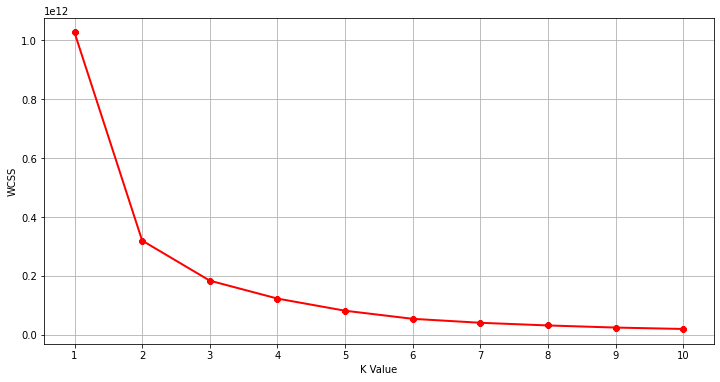

In [76]:
# Traçons la somme des carrés dans la cluster (WCSS) par rapport au nombre de clusters (valeur k) pour déterminer la valeur optimale du nombre de clusters.
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Dataframes.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Calculons la méthode des erreurs au carré(WSS) au sein du cluster pour différentes valeurs de k et choissisons le k pour lequel le wcss commence d'abord à diminuer.
La valeur de k optimale est de 3 en utilsant la méthode de courbe.

In [77]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(Dataframes.iloc[:,1:])
Dataframes["label"] = clusters

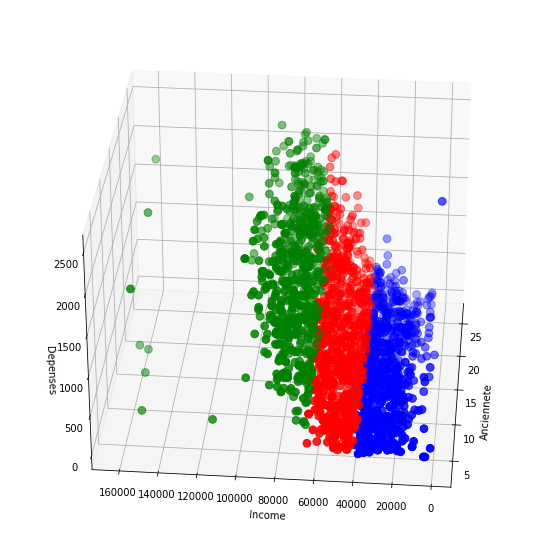

In [78]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Dataframes.Anciennete[Dataframes.label == 0], Dataframes["Income"][Dataframes.label == 0], Dataframes["Depenses"][Dataframes.label == 0], c='blue', s=60)
ax.scatter(Dataframes.Anciennete[Dataframes.label == 1], Dataframes["Income"][Dataframes.label == 1], Dataframes["Depenses"][Dataframes.label == 1], c='red', s=60)
ax.scatter(Dataframes.Anciennete[Dataframes.label == 2], Dataframes["Income"][Dataframes.label == 2], Dataframes["Depenses"][Dataframes.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Anciennete")
plt.ylabel("Income")
ax.set_zlabel('Depenses')
plt.show()

## Autre méthode de Segmentation (GaussianMixture)

In [79]:
Data_select = Dataframes[['Income','Anciennete','Depenses']]

In [80]:
X = normalize(Data_select)

In [81]:
GauM = GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)
labels = GauM.predict(X)

In [82]:
Data_select['Cluster'] = labels
Data_select = Data_select.replace({0:'Stars',1:'Attention',2:'Level up',3:'Level down'})
Dataframes = Dataframes.merge(Data_select.Cluster, left_index=True, right_index=True)

In [83]:
pd.options.display.float_format = "{:.0f}".format
summary = Dataframes[['Income','Depenses','Anciennete','Cluster']]
summary.set_index("Cluster", inplace = True)
summary = summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       Attention  Level down  Level up  Stars
Income count       1018         685         1    511
       mean       36750       60622      2447  70789
       std        15256       17671       nan  14357
       min         1730        5648      2447   4428
       25%        26876       50200      2447  63688

#### Traçons ces données pour visualiser le regroupement des clients

In [84]:
PLOT = go.Figure()
for C in list(Dataframes.Cluster.unique()):
    

    PLOT.add_trace(go.Scatter3d(x = Dataframes[Dataframes.Cluster == C]['Income'],
                                y = Dataframes[Dataframes.Cluster == C]['Anciennete'],
                                z = Dataframes[Dataframes.Cluster == C]['Depenses'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Anciennete: %{y} <br>Depenses: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Anciennete', titlefont_color = 'black'),
                                zaxis=dict(title = 'Depenses', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Préparons les données pour l'analyse de la personnalité du client

#### Définissons trois segments de clientèle selon l'age, le revenu et l'ancienneté

In [85]:
# Segmentation de l'age

Dataframes['Age_Group'] =  Data['Age_Group']
Dataframes['Age_Group']

0       Adultes
1       Adultes
2       Adultes
3        Mature
4        Mature
         ...   
2235    Adultes
2236    Seniors
2237     Mature
2238    Adultes
2239    Adultes
Name: Age_Group, Length: 2215, dtype: object

In [86]:
# Segmentation du revenu

cut_labels_Income = ["Bas revenu", "Revenu passable", "Revenu moyen", "Revenu élévé"]
Dataframes['Income_group'] = pd.qcut(Dataframes['Income'], 4, labels=cut_labels_Income)
Dataframes['Income_group']

0          Revenu moyen
1       Revenu passable
2          Revenu élévé
3            Bas revenu
4          Revenu moyen
             ...       
2235       Revenu moyen
2236       Revenu moyen
2237       Revenu moyen
2238       Revenu élévé
2239       Revenu moyen
Name: Income_group, Length: 2215, dtype: category
Categories (4, object): ['Bas revenu' < 'Revenu passable' < 'Revenu moyen' < 'Revenu élévé']

In [87]:
# Segmentation de l'ancienneté

cut_labels_Seniority = ['Nouveau client', 'client passable', 'client expérimenté', 'Ancien client']
Dataframes['Anciennete_group'] = pd.qcut(Dataframes['Anciennete'], q=4, labels=cut_labels_Seniority)

# Suppression de la variable 'Age', 'Income', 'Anciennete'
Dataframes=Dataframes.drop(columns=['Age','Income','Anciennete'])

#### Maintenant définissons de nouveaux segments en fonction des dépenses des clients sur chaque produit qui serons basés sur :
* Non acheteur
* Acheteur faible
* Acheteur fréquent
* Plus gros acheteur

In [88]:
cut_labels = ['Faible consommateur', 'Consommateur Fréquent', 'Grand consommateur']
Dataframes['Vin_segment'] = pd.qcut(Dataframes['Vins'][Dataframes['Vins']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes['Fruits_segment'] = pd.qcut(Dataframes['Fruits'][Dataframes['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes['Viande_segment'] = pd.qcut(Dataframes['Viande'][Dataframes['Viande']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes['Poisson_segment'] = pd.qcut(Dataframes['Poisson'][Dataframes['Poisson']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes['Sucreries_segment'] = pd.qcut(Dataframes['Sucreries'][Dataframes['Sucreries']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes['Or_segment'] = pd.qcut(Dataframes['Or'][Dataframes['Or']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
Dataframes.replace(np.nan, "Non conommateur",inplace=True)
Dataframes.drop(columns=['Depenses','Vins','Fruits','Viande','Poisson','Sucreries','Or'],inplace=True)
Dataframes = Dataframes.astype(object)

In [89]:
# Observons notre nouveau dataset
Dataframes

Education Marital_Status Enfants Nbr_Enf label     Cluster Age_Group  \
0            1              0       0       0     1       Stars   Adultes   
1            1              0       1       2     1   Attention   Adultes   
2            1              1       0       0     2  Level down   Adultes   
3            1              1       1       1     0   Attention    Mature   
4            1              1       1       1     1  Level down    Mature   
...        ...            ...     ...     ...   ...         ...       ...   
2235         1              1       1       1     1       Stars   Adultes   
2236         1              1       1       3     1  Level down   Seniors   
2237         1              0       0       0     1       Stars    Mature   
2238         1              1       1       1     2  Level down   Adultes   
2239         1              1       1       2     1   Attention   Adultes   

         Income_group    Anciennete_group            Vin_segment  \
0        Revenu moyen       Ancien client     Grand consommateur   
1     Revenu passable      Nouveau client    Faible consommateur   
2        Revenu élévé     client passable  Consommateur Fréquent   
3          Bas revenu      Nouveau client    Faible consommateur   
4        Revenu moyen      Nouveau client  Consommateur Fréquent   
...               ...                 ...                    ...   
2235     Revenu moyen  client expérimenté     Grand consommateur   
2236     Revenu moyen      Nouveau client  Consommateur Fréquent   
2237     Revenu moyen      Nouveau client     Grand consommateur   
2238     Revenu élévé      Nouveau client  Consommateur Fréquent   
2239     Revenu moyen       Ancien client  Consommateur Fréquent   

             Fruits_segment         Viande_segment        Poisson_segment  \
0        Grand consommateur     Grand consommateur     Grand consommateur   
1       Faible consommateur    Faible consommateur    Faible consommateur   
2        Grand consommateur  Consommateur Fréquent     Grand consommateur   
3       Faible consommateur  Consommateur Fréquent  Consommateur Fréquent   
4     Consommateur Fréquent  Consommateur Fréquent  Consommateur Fréquent   
...                     ...                    ...                    ...   
2235  Consommateur Fréquent  Consommateur Fréquent  Consommateur Fréquent   
2236        Non conommateur  Consommateur Fréquent        Non conommateur   
2237     Grand consommateur  Consommateur Fréquent  Consommateur Fréquent   
2238  Consommateur Fréquent  Consommateur Fréquent     Grand consommateur   
2239    Faible consommateur  Consommateur Fréquent    Faible consommateur   

          Sucreries_segment             Or_segment  
0        Grand consommateur     Grand consommateur  
1       Faible consommateur    Faible consommateur  
2     Consommateur Fréquent  Consommateur Fréquent  
3       Faible consommateur    Faible consommateur  
4     Consommateur Fréquent  Consommateur Fréquent  
...                     ...                    ...  
2235     Grand consommateur     Grand consommateur  
2236        Non conommateur    Faible consommateur  
2237  Consommateur Fréquent  Consommateur Fréquent  
2238  Consommateur Fréquent     Grand consommateur  
2239    Faible consommateur  Consommateur Fréquent  

[2215 rows x 15 columns]

Dans notre dataset nous voyons les clients avec :
 * un revenu (Bas,moyen, passable, élévé),
 * une forte, une faible consommation,
 * leur niveau d'ancienneté
 * Leur consommation en fonction du produit

Maintenant, utilisons un simple algorithme(Apriori Algorithm) pour déterminer le plus gros consommateur de vin

In [90]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=Dataframes.copy() 
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Vins'
segment='Meilleur consommateur'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

Conclusion : D'après les résultats et l'analyse globale menés sur ces données traitant de l'analyse de la personnalité des clients avec Python, nous pouvons conclure que les plus gros clients de vins sont :

* Clients avec un revenu moyen d'environ 69 500
* Clients avec une dépense totale moyenne d'environ 1 252 
* Clients enregistrés auprès de l'entreprise depuis environ 21 mois.
* Clients titulaires d'un diplôme d'études supérieures.
* Et des clients qui sont aussi de gros consommateurs de produits carnés. 

J'espère que vous avez aimé cet article sur l'analyse de la personnalité client avec Python. N'hésitez pas à poser vos précieuses questions dans la section commentaires ci-dessous. 